In [16]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [17]:
dataset = openml.datasets.get_dataset(886)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.Series(y)

In [19]:
X.head()

,no2_concentration,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11


In [20]:
y.head()

0    0
1    1
2    0
3    1
4    1
dtype: int32

In [21]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=20,
                                  population_size=6000,
                                  hall_of_fame=100,
                                  n_components=7,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.2  ,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.47        0.0666261        8         0.285665         0.172397     10.51s
   1    11.74         0.103962       21         0.369545         0.231046     42.13s
   2    10.69         0.129146        9         0.377666         0.199657      1.20m
   3    12.86         0.143611        7          0.43764         0.172898      2.91m
   4    15.54         0.178432       25          0.41746         0.150869      2.79m
   5    16.77         0.203306       18         0.454271        0.0416518     43.71s
   6    19.35          0.21652        8         0.440121        0.0901972     42.14s
   7    22.39         0.232704       33         0.433781         0.165827     53.56s
   8    27.34         0.245681       15         0.431449         0.194316  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.5, n_components=7, n_jobs=-1,
                    parsimony_coefficient=0.0001, population_size=6000,
                    random_state=42, verbose=1)

In [22]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20.0,1.412021,1.461108,1.487740,1.412021,1.013001,1.056439,1.811128
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14.0,1.144772,1.110604,1.320396,0.876813,0.849468,0.999516,1.671444
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4.0,1.763506,2.008940,1.482768,2.418543,0.930061,1.831986,1.823990
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23.0,1.656754,1.595160,1.667105,1.057931,0.781086,1.164791,1.580625
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11.0,1.793149,1.882397,1.407921,1.518598,0.990656,1.793149,2.089941


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
clf = SymbolicClassifier(
    population_size=6000,
    generations=40,
    stopping_criteria=0.01,
    p_crossover=0.5,
    p_hoist_mutation=0.1,
    p_point_mutation=0.2,
    p_subtree_mutation=0.2,
    metric='log loss',
    parsimony_coefficient=0.001,
    max_samples=0.2,
    verbose=1,
    random_state=0,
    n_jobs=-1
)

clf.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    27.06          7.32416        5         0.633512         0.655593     25.49s
   1    10.02          2.25118        5         0.618087         0.675856      2.23m
   2     4.98          1.80095        5         0.606298         0.682808      1.51m
   3     4.75          1.33149        7          0.57908         0.668581      1.57m
   4     4.37          1.25695        5         0.578721         0.683738      1.53m
   5     4.28          1.21121       15         0.536228         0.735361      1.61m
   6     4.67          1.20441       13         0.557779         0.694803      2.70m
   7     5.34          1.21922       11         0.559607         0.664508      4.58m
   8     6.02          1.16225       15         0.540455         0.715953  

SymbolicClassifier(generations=40, max_samples=0.5, n_jobs=-1, p_crossover=0.8,
                   p_hoist_mutation=0.05, p_point_mutation=0.05,
                   p_subtree_mutation=0.1, population_size=6000, random_state=0,
                   stopping_criteria=0.01, verbose=1)

In [25]:
y_pred_train = pd.Series(clf.predict(X_train), index=X_train.index)
y_pred_train.head()

5      1
116    1
45     0
16     1
462    1
dtype: int32

In [26]:
y_pred_test = pd.Series(clf.predict(X_test), index=X_test.index)
y_pred_test.head()

361    1
73     1
374    1
155    1
104    0
dtype: int32

In [27]:
print("Score of train samples whit the model: ", clf.score(X_train, y_train))
print("Score of test samples while the model: ", clf.score(X_test, y_test))

Score of train samples whit the model:  0.6685714285714286
Score of test samples while the model:  0.6866666666666666


In [28]:
y_proba_full = clf.predict_proba(X_test)

y_proba_positive = y_proba_full[:, 1]

auc_binary = roc_auc_score(y_test, y_proba_positive)
print("ROC AUC (Binary Score):", auc_binary)

ROC AUC (Binary Score): 0.7154558404558404


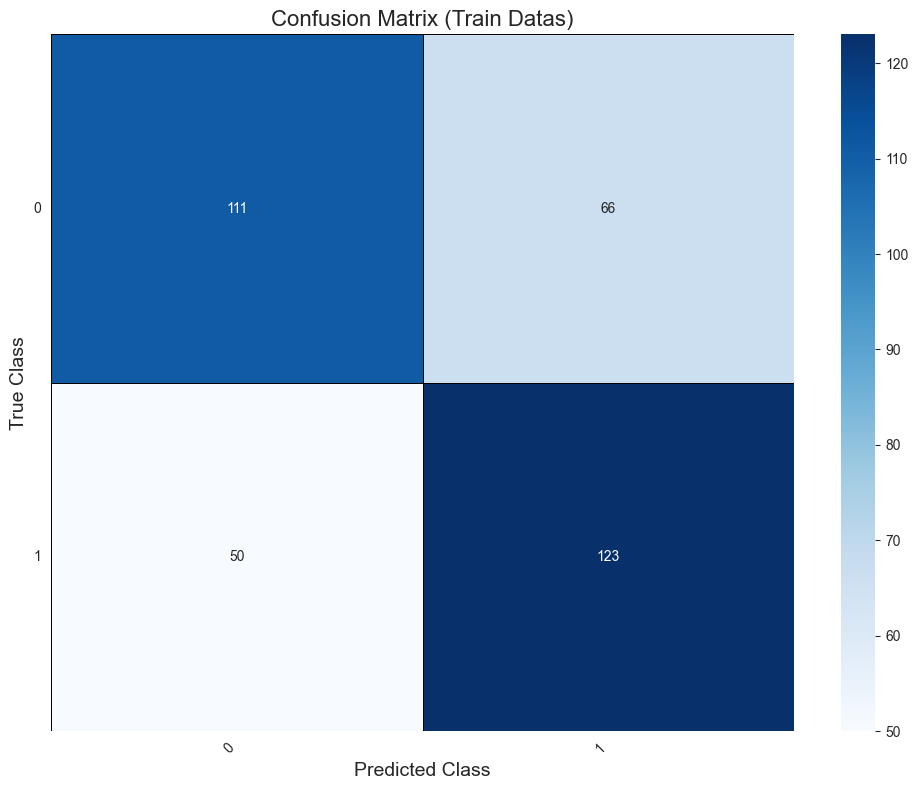

In [29]:
cm = confusion_matrix(y_train, y_pred_train)
cm_df = pd.DataFrame(cm, index=y_train.unique(), columns=y_train.unique())

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=.5,
    linecolor='black'
)

plt.title('Confusion Matrix (Train Datas)', fontsize=16)
plt.ylabel('True Class', fontsize=14)
plt.xlabel('Predicted Class', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

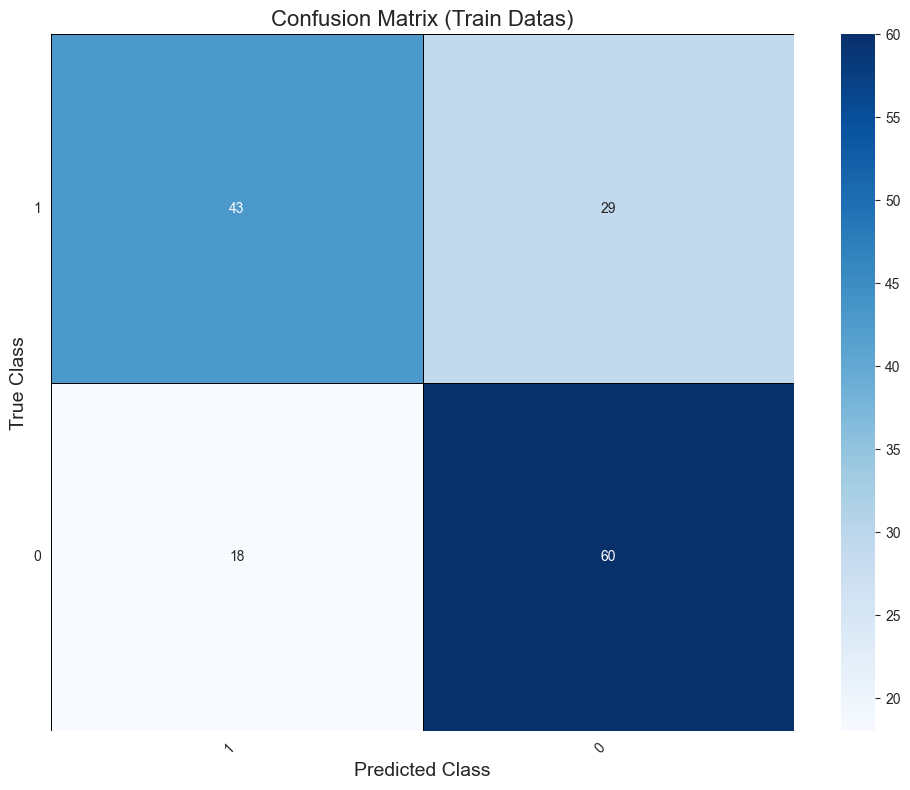

In [30]:
cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm, index=y_test.unique(), columns=y_test.unique())

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    linewidths=.5,
    linecolor='black'
)

plt.title('Confusion Matrix (Train Datas)', fontsize=16)
plt.ylabel('True Class', fontsize=14)
plt.xlabel('Predicted Class', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()